In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import pandas as pd

In [3]:
data_set = pd.read_csv("tokens.csv")

In [4]:
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = data_set["title"].tolist()
list_labels = data_set["Classifier"].tolist()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size = 0.2, random_state = 1999)

In [6]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [7]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

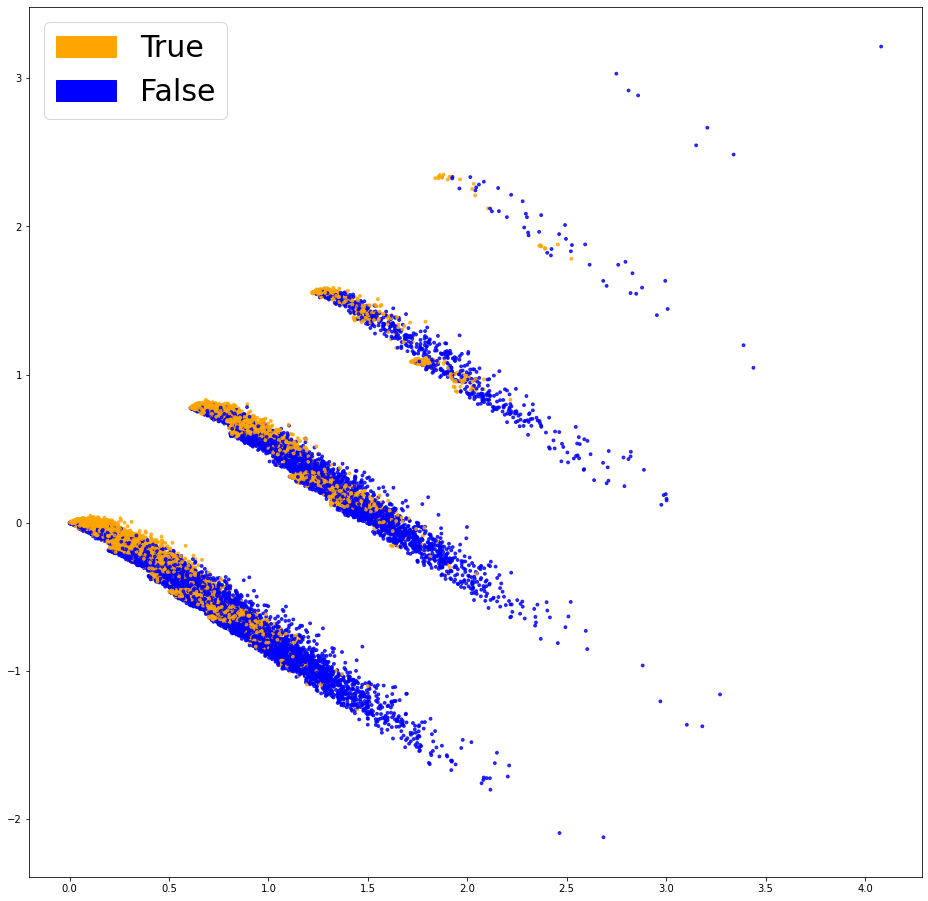

In [8]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='True')
            green_patch = mpatches.Patch(color='blue', label='False')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=1999)

clf.fit(X_train_counts, y_train)

LogisticRegression(C=30.0, class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, random_state=1999, solver='newton-cg')

In [10]:
clf.fit(X_train_counts, y_train)

LogisticRegression(C=30.0, class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, random_state=1999, solver='newton-cg')

In [13]:
y_predicted_percentages = clf.predict_proba(X_test_counts)

In [15]:
print(y_predicted_percentages)

[[9.99972490e-01 2.75097595e-05]
 [9.99765743e-01 2.34257402e-04]
 [9.99999197e-01 8.02857767e-07]
 ...
 [7.21280601e-06 9.99992787e-01]
 [9.99997964e-01 2.03633416e-06]
 [1.98484045e-06 9.99998015e-01]]
